# Post-Covid Global Layoff Trends: Insights & Analysis

### This project dives into Global Layoff Trends Post-Covid, analysing how industries, company stages, funding, and locations influenced workforce reductions. By transforming raw data into interactive visualizations, it uncovers hidden patterns, highlights the most affected sectors and regions, and tells a compelling story of how the job market evolved. 

### The goal is to provide actionable, data-driven insights that are easy to explore and understand, making complex workforce shifts immediately clear to anyone reviewing the analysis.

In [1]:
# Dateset Link: https://www.kaggle.com/datasets/swaptr/layoffs-2022

In [2]:
# For Data handling
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# For SQL queries
import sqlite3

In [3]:
# Loading CSV into python
df = pd.read_csv('layoffs.csv')

In [4]:
# Creating SQLite database
conn = sqlite3.connect('layoffs.db')

In [5]:
# Loading data into SQLite
df.to_sql('layoffs', conn, if_exists = 'replace', index = False)

4149

In [6]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,9/1/2025,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,$75,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,9/1/2025,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,$375,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,9/1/2025,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,$304,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,8/31/2025,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,$65,United States,9/2/2025
4,Flip,SF Bay Area,NaN,8/29/2025,100%,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,$294,United States,8/30/2025


In [7]:
df.shape

(4149, 11)

In [8]:
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'funds_raised', 'country', 'date_added'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [10]:
df.describe()

,total_laid_off
count,2703.000000
mean,283.490566
std,976.103479
min,3.000000
25%,40.000000
50%,87.000000
75%,200.000000
max,22000.000000


In [11]:
df.describe(include = 'all')

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
count,4149,4148,2703.000000,4149,2633,4147,4146,4144,3688,4147,4149
unique,2820,265,NaN,1094,73,30,3898,16,718,66,955
top,Microsoft,SF Bay Area,NaN,4/2/2020,100%,Finance,Internal memo,Post-IPO,$1,United States,11/17/2022
freq,15,1034,NaN,27,329,494,101,943,45,2639,45
mean,NaN,NaN,283.490566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,976.103479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking missing values

In [12]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

<Axes: >

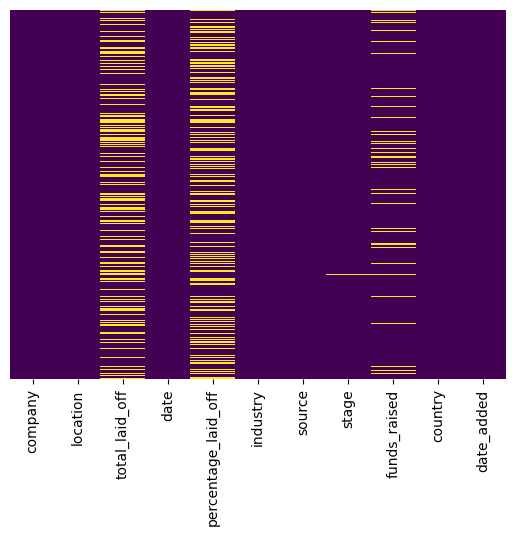

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

## Data Standardization

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [16]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [17]:
df['date'] = df['date'].astype('datetime64[ns]')

In [18]:
df['date'].dtype

dtype('<M8[ns]')

In [19]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

In [20]:
df['percentage_laid_off'].unique()[:20]

array([nan, '100%', '9%', '2%', '23%', '10%', '12%', '6%', '34%', '16%',
       '40%', '7%', '14%', '3%', '25%', '4%', '1%', '30%', '17%', '20%'],
      dtype=object)

In [21]:
df['percentage_laid_off'] = df['percentage_laid_off'].astype(str).str.replace('%', '', regex = True)

In [22]:
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0).astype('float')

In [23]:
df['percentage_laid_off'].dtype

dtype('float64')

In [24]:
df['funds_raised'].unique()[:30]

array(['$75', '$375', '$304', '$65', '$294', '$3500', '$778', '$19', nan,
       '$2', '$548', '$127', '$164', '$26', '$166', '$736', '$1900',
       '$436', '$243', '$15', '$140', '$210', '$565', '$3000', '$726',
       '$9', '$5200', '$8100', '$5', '$602'], dtype=object)

In [25]:
df['funds_raised'] = df['funds_raised'].astype(str).str.replace('$','')

In [26]:
df['funds_raised'].unique()[:30]

array(['75', '375', '304', '65', '294', '3500', '778', '19', 'nan', '2',
       '548', '127', '164', '26', '166', '736', '1900', '436', '243',
       '15', '140', '210', '565', '3000', '726', '9', '5200', '8100', '5',
       '602'], dtype=object)

In [27]:
df['funds_raised'] = df['funds_raised'].fillna(0).astype('float')

In [28]:
df['funds_raised'].dtype

dtype('float64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4149 non-null   object        
 1   location             4148 non-null   object        
 2   total_laid_off       2703 non-null   float64       
 3   date                 4149 non-null   datetime64[ns]
 4   percentage_laid_off  2633 non-null   float64       
 5   industry             4147 non-null   object        
 6   source               4146 non-null   object        
 7   stage                4144 non-null   object        
 8   funds_raised         3688 non-null   float64       
 9   country              4147 non-null   object        
 10  date_added           4149 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 356.7+ KB


In [30]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,375.0,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,2025-09-01,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,304.0,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,2025-08-31,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,65.0,United States,9/2/2025
4,Flip,SF Bay Area,NaN,2025-08-29,100.0,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,294.0,United States,8/30/2025


In [31]:
categorical_cols = ['company','industry','location','stage','source','country']

In [32]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [33]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.title() if isinstance(x, str) else x)

In [34]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [35]:
df['location'].unique()[:20]

array(['Mumbai,Non-U.S.', 'Bengaluru,Non-U.S.', 'Sf Bay Area', 'Seattle',
       'Boston', 'London,Non-U.S.', 'Los Angeles', 'Toronto,Non-U.S.',
       'St. Louis', 'Tokyo,Non-U.S.', 'New York City', 'Sydney,Non-U.S.',
       'Cologne,Non-U.S.', 'Bengaluru', 'Detroit', 'Raleigh',
       'Minneapolis', 'Stockholm,Non-U.S.', 'Sacramento', 'Austin'],
      dtype=object)

In [36]:
df['location'] = df['location'].str.split(',', n = 1, expand = True)[0].str.strip()

In [37]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025


In [38]:
df.rename(columns =  {'funds_raised': 'funds_raised_millions'}, inplace = True)

In [39]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [40]:
df['year'] = df['date'].dt.year

In [41]:
df['month_name'] = df['date'].dt.month_name()

In [42]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


# Handling Missing Values

In [43]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      3
stage                       5
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

<Axes: >

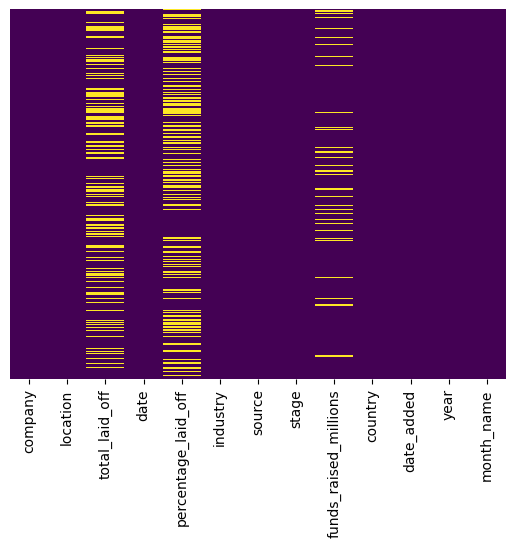

In [44]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [45]:
df['source'] = df['source'].fillna('unknown')

In [46]:
df['stage'] = df['stage'].fillna('unknown')

In [47]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      0
stage                       0
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [48]:
df['funds_raised_millions'] = df['funds_raised_millions'].fillna(0)

In [49]:
df['funds_raised_millions'].isnull().sum()

np.int64(0)

In [50]:
df[df['industry'].isnull()][['company','industry']]

,company,industry
30,Eyeo,NaN
1081,Appsmith,NaN


In [51]:
df[df['company'] == 'Eyeo'][['company','industry']].head()

,company,industry
30,Eyeo,NaN


In [52]:
df[df['company'] == 'Appsmith'][['company','industry']].head()

,company,industry
1081,Appsmith,NaN


In [53]:
df.loc[df['company'] == 'Eyeo', 'industry'] = 'Software'

In [54]:
df.loc[df['company'] == 'Appsmith', 'industry'] = 'Software'

In [55]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [56]:
df[df['country'].isnull()][['company','location','country']]

,company,location,country
1073,Fit Analytics,Berlin,NaN
1358,Ludia,Montreal,NaN


In [57]:
df.loc[df['location'] == 'Berlin', 'country'] = 'Germany'

In [58]:
df.loc[df['location'] == 'Montreal', 'country'] = 'Canada'

In [59]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [60]:
df[df['location'].isna()][['location','country']]

,location,country
1039,NaN,United States


In [61]:
df['location'] = df['location'].fillna('Unknown')

In [62]:
df.isnull().sum()

company                     0
location                    0
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [63]:
# total_laid_off And percentage_laid_off

missing_both = df[df['total_laid_off'].isnull() & df['percentage_laid_off'].isnull()]
missing_both

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
6,Verily,Sf Bay Area,NaN,2025-08-26,NaN,Healthcare,Https://Www.Businessinsider.Com/Alphabets-Veri...,Subsidiary,3500.0,United States,8/30/2025,2025,August
7,Klaviyo,Boston,NaN,2025-08-25,NaN,Marketing,Https://Www.Theinformation.Com/Briefings/Klavi...,Unknown,778.0,United States,8/25/2025,2025,August
9,Tiktok,London,NaN,2025-08-22,NaN,Consumer,Https://Www.Wsj.Com/Tech/Tiktok-To-Lay-Off-Hun...,Acquired,0.0,United Kingdom,8/23/2025,2025,August
18,Amdocs,St. Louis,NaN,2025-08-12,NaN,Support,Https://Www.Calcalistech.Com/Ctechnews/Article...,Post-Ipo,0.0,United States,8/18/2025,2025,August
19,Crunchyroll,Tokyo,NaN,2025-08-12,NaN,Media,Https://Www.Thewrap.Com/Crunchyroll-Restructur...,Acquired,26.0,Japan,8/18/2025,2025,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,Spothero,Chicago,NaN,2020-03-24,NaN,Transportation,Https://Americaninno.Com/Chicago/Inno-News-Chi...,Series D,117.0,United States,3/28/2020,2020,March
4127,Zwift,Los Angeles,NaN,2020-03-23,NaN,Fitness,Https://Www.Dcrainmaker.Com/2020/03/Zwift-Lays...,Series B,164.0,United States,4/2/2020,2020,March
4133,Vacasa,Portland,NaN,2020-03-20,NaN,Travel,Https://Www.Bizjournals.Com/Portland/News/2020...,Series C,526.0,United States,3/28/2020,2020,March
4138,Anyvision,Tel Aviv,NaN,2020-03-19,NaN,Security,Https://Ipvm.Com/Reports/Anyvision-20-Layoffs,Series A,74.0,Israel,3/30/2020,2020,March


In [64]:
df['industry'].unique()

array(['Consumer', 'Ai', 'Sales', 'Healthcare', 'Marketing', 'Retail',
       'Infrastructure', 'Other', 'Transportation', 'Food', 'Security',
       'Support', 'Media', 'Fitness', 'Finance', 'Software', 'Logistics',
       'Crypto', 'Real Estate', 'Product', 'Data', 'Hardware', 'Hr',
       'Education', 'Energy', 'Manufacturing', 'Travel', 'Aerospace',
       'Recruiting', 'Construction', 'Legal'], dtype=object)

In [65]:
# grouping the data by industry

industry_groups = df.groupby('industry')

In [66]:
# calculating median of total_laid_off for each industry

industry_median = industry_groups['total_laid_off'].median()

In [67]:
industry_median

industry
Aerospace         100.0
Ai                 21.0
Construction      127.0
Consumer          100.0
Crypto             69.0
Data               80.0
Education          95.0
Energy            154.0
Finance            71.0
Fitness           135.0
Food              124.0
Hardware          305.5
Healthcare         82.5
Hr                 59.0
Infrastructure     67.5
Legal              75.0
Logistics          64.0
Manufacturing     108.0
Marketing          52.0
Media              50.0
Other             110.0
Product            35.5
Real Estate       100.0
Recruiting         58.0
Retail            100.0
Sales              70.0
Security           70.0
Software           35.0
Support            95.0
Transportation    129.0
Travel            137.0
Name: total_laid_off, dtype: float64

In [68]:
# Filling Nan in total_laid_off using industry median

df['total_laid_off'] = df['total_laid_off'].fillna(df['industry'].map(industry_median))

In [69]:
df.isnull().sum()

company                     0
location                    0
total_laid_off              0
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [70]:
# Grouping industry wise median

industry_median_pct = df.groupby('industry')['percentage_laid_off'].median()

In [71]:
industry_median_pct

industry
Aerospace         25.0
Ai                20.0
Construction      16.0
Consumer          17.0
Crypto            20.0
Data              13.5
Education         20.0
Energy            25.0
Finance           20.0
Fitness           18.0
Food              20.0
Hardware           7.0
Healthcare        20.0
Hr                15.0
Infrastructure    13.0
Legal             10.0
Logistics         15.0
Manufacturing     15.0
Marketing         14.0
Media             15.0
Other             15.0
Product           16.0
Real Estate       22.0
Recruiting        17.5
Retail            18.0
Sales              9.5
Security          10.0
Software          32.5
Support           10.0
Transportation    17.0
Travel            22.0
Name: percentage_laid_off, dtype: float64

In [72]:
## Filling missing percentage_laid_off 

df['percentage_laid_off'] = df['percentage_laid_off'].fillna(df['industry'].map(industry_median_pct))

In [73]:
df['percentage_laid_off'].isnull().sum()

np.int64(0)

In [74]:
df.isnull().sum()

company                  0
location                 0
total_laid_off           0
date                     0
percentage_laid_off      0
industry                 0
source                   0
stage                    0
funds_raised_millions    0
country                  0
date_added               0
year                     0
month_name               0
dtype: int64

In [75]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


In [76]:
df = df.drop(columns = ['date_added','source'])

In [77]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Series C,294.0,United States,2025,August
